In [1]:
from odps import ODPS, options
from odps.df import agg
# from odps.inter import setup, enter, teardown
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
options.sql.use_odps2_extension = True
odps = ODPS('LTAItDVDpC9aEMXJ', 'U6iEFCZCzoPUbjou1FW45SQruxIfFt', 'Qkids_V2_dev')
            #endpoint='**your-end-point**')
# %load_ext odps
# setup('LTAItDVDpC9aEMXJ', 'U6iEFCZCzoPUbjou1FW45SQruxIfFt', 'Qkids_V2_dev')
# room = enter()
# odps = room.odps

In [2]:
student_process_test = odps.get_table("qkids_v2_dev.dwd_student_process_test_synthetic").to_df()
vip_students = odps.get_table("dwd_students").to_df()
vips = vip_students[vip_students.vip==1].user_id.to_pandas()
mean_process_test = odps.get_table("qkids_v2_dev.dws_stduent_process_test_synthetic_mean_by_lesson_category").to_df().to_pandas()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

In [5]:
vips

0               4
1               7
2               9
3              18
4              20
           ...   
130602    1562580
130603    1562788
130604    1565002
130605    1565160
130606    1574757
Name: user_id, Length: 130607, dtype: int64

In [167]:
mean_process_test.head(10)

,lesson_id,series_id,ordered_id,category,avg_score,std_val,stds_val
0,1,1,1,grammar,92.21,14.217520,14.217574
1,1,1,1,listening,93.50,12.100718,12.100755
2,1,1,1,pronunciation,81.21,25.048571,25.048644
3,2,1,2,reading,95.53,12.519620,12.519665
4,2,1,2,vocabulary,96.97,9.158359,9.158392
5,3,1,3,grammar,96.34,11.259898,11.259944
6,3,1,3,reading,90.77,17.100094,17.100164
7,3,1,3,spelling,84.64,21.610126,21.610340
8,5,1,6,grammar,97.38,8.829099,8.829153
9,5,1,6,reading,92.81,15.857086,15.857184


In [163]:
student_process_test.head(10)

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

DFViewWidget()

,user_id,lesson_id,category,val
0,1,366,pronunciation,0.00
1,5,719,listening,78.00
2,5,719,reading,78.00
3,5,719,sightwords,78.00
4,5,719,spelling,78.00
5,5,719,vocabulary,78.00
6,7,1,listening,80.00
7,7,1,pronunciation,88.19
8,7,1,vocabulary,100.00
9,7,2,grammar,66.60


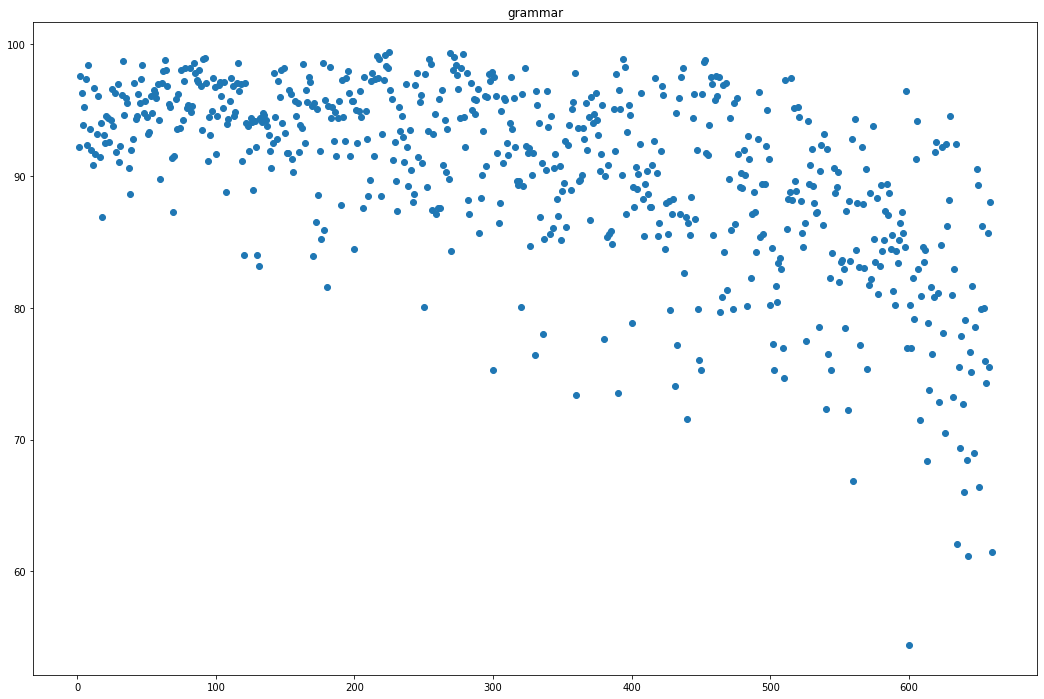

In [6]:
# 查看不同个类型的整体学生评分
category = "grammar"
cat_df = mean_process_test.loc[(mean_process_test.category == category) & (mean_process_test.ordered_id > 0)]
f = plt.figure(figsize=(18,12))
# f.set_title(category)
plt.title(category)
plt.scatter(cat_df.ordered_id, cat_df.avg_score)

In [33]:
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
lessons = list(range(1,121))
def hist_33(category):
    fig1, axs = plt.subplots(3, 3, figsize=(16,12), constrained_layout=True)
    axs = trim_axs(axs, 9)
    for ax, user_id in zip(axs, vips.sample(n=9)):
        ax.set_title('user_id=%s' % str(user_id))
        ax.set_ylim(-1.5, 1)
        ax.set_xlim(lessons[0], lessons[-1])
        user = data[(student_process_test.user_id==user_id) & (student_process_test.category == category) & (student_process_test.lesson_id.isin(lessons))].to_pandas()
        user = user.set_index('lesson_id')
        mean_df = mean_process_test.loc[(mean_process_test.category==category) & (mean_process_test.lesson_id.isin(lessons))].set_index('lesson_id')
        mean_std = mean_df['std_val'].apply(lambda x:  np.nan if x == 0 else x)
        zof = (user.val - mean_df.avg_score)/mean_std
        ax.bar(zof.index, zof.values)

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

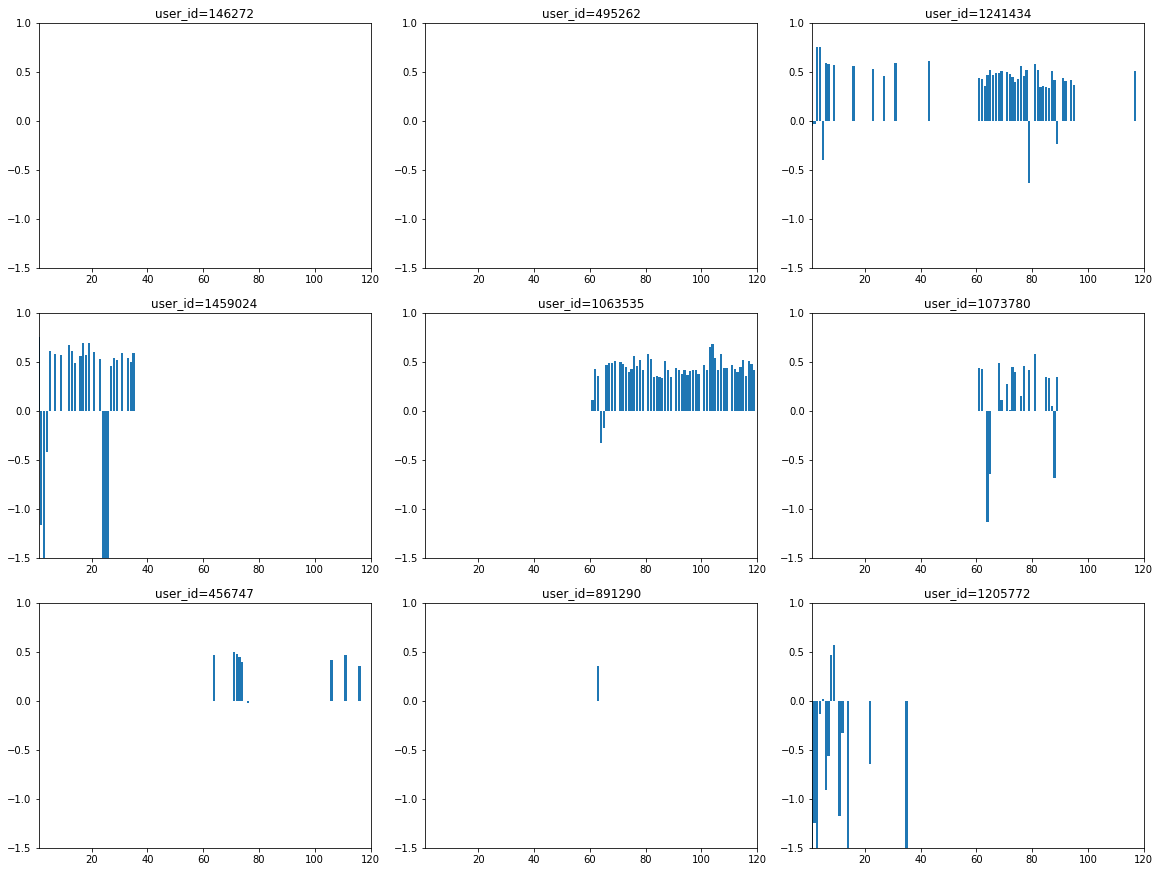

In [34]:
category = "pronunciation"
hist_33(category)

In [29]:
def show_student(user_id):
    lessons = list(range(1,121))
    user = student_process_test[(student_process_test.user_id == user_id) & (student_process_test.lesson_id > 0) & (student_process_test.lesson_id < 121)].to_pandas()
    fig1, axs = plt.subplots(3, 3, figsize=(16,12), constrained_layout=True)
    axs = trim_axs(axs, 9)
    for ax, category in zip(axs, user.category.unique()):
        ax.set_title(f"category={category}")
        ax.set_xlim([lessons[0], lessons[-1]])
        user_category = user.loc[user.category == category]
        user_category = user_category.set_index('lesson_id')
        category_mean_df = mean_process_test.loc[(mean_process_test.category==category) & (mean_process_test.lesson_id.isin(lessons))].set_index('lesson_id')
        category_mean_df_std = category_mean_df['std_val'].apply(lambda x:  np.nan if x == 0 else x)
        zof = (user_category.val - category_mean_df.avg_score)/category_mean_df_std
        ax.bar(zof.index, zof.values)
## 查看做题情况
def user_test_optines(user_id):
    user = student_process_test[(student_process_test.user_id == user_id) & (student_process_test.lesson_id > 0) & (student_process_test.lesson_id < 121)].to_pandas()
    user_cate = user.pivot(index='lesson_id', columns="category", values="val")
    return user_cate

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

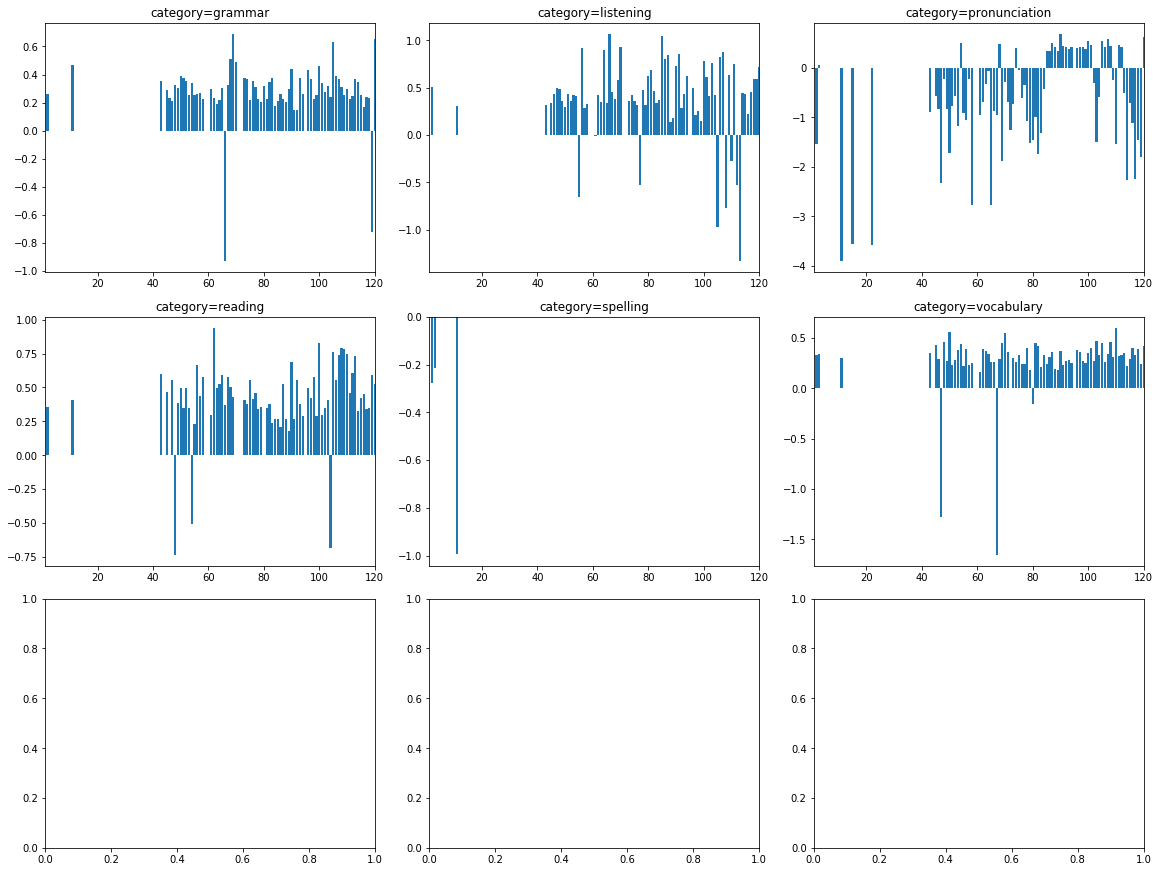

In [30]:
user_id = int(vips.sample(1).values[0])
show_student(475669)

In [24]:
user_test_optines(475669)

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

category,grammar,listening,pronunciation,reading,spelling,vocabulary
lesson_id,,,,,,
2,100.0,100.0,40.0,100.0,80.0,100.0
3,NaN,NaN,80.0,NaN,80.0,100.0
11,100.0,100.0,0.0,100.0,60.0,100.0
15,NaN,NaN,0.0,NaN,NaN,NaN
22,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
116,100.0,100.0,75.0,100.0,NaN,100.0
117,100.0,100.0,43.0,100.0,NaN,100.0
118,100.0,100.0,57.0,100.0,NaN,100.0


In [82]:
def get_star_by_score(score, avg_score, std):
    if score == 100:
        return 3
    elif score >= avg_score:
        return 2
    elif score >= avg_score-std:
        return 1
    else:
        return 0
def culumice(category):
    fig1, axs = plt.subplots(3, 5, figsize=(24,9), constrained_layout=True)
    axs = trim_axs(axs, 15)
    lessons = list(range(1,121))
    for ax, user_id in zip(axs, vips.sample(n=80)):
        ax.set_title('user_id=%s, category=%s' % (str(user_id), category))
        ax.set_xlim((0, 120))
        user = student_process_test[(student_process_test.user_id==user_id) & (student_process_test.category == category)].to_pandas()
        user = user.loc[user.lesson_id.isin(lessons)]
        if len(user) == 0:
            continue
        user = user.set_index('lesson_id')
        mean_df = mean_process_test.loc[mean_process_test.category==category].set_index('lesson_id')
        complexs = user.join(mean_df, lsuffix="_same")
        complexs['star'] =  complexs.apply(lambda x: get_star_by_score(x.val, x.avg_score, x.std_val), axis=1)
        complexs['mean_star'] = 2
        complexs['max_star'] = 3
        output = complexs[['mean_star', 'star', 'max_star']].cumsum()
        ax.plot(output.index, output.mean_star, label='common level')
        ax.plot(output.index, output.star, label="your level")
        ax.plot(output.index, output.max_star, label="perfect")
        ax.legend()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

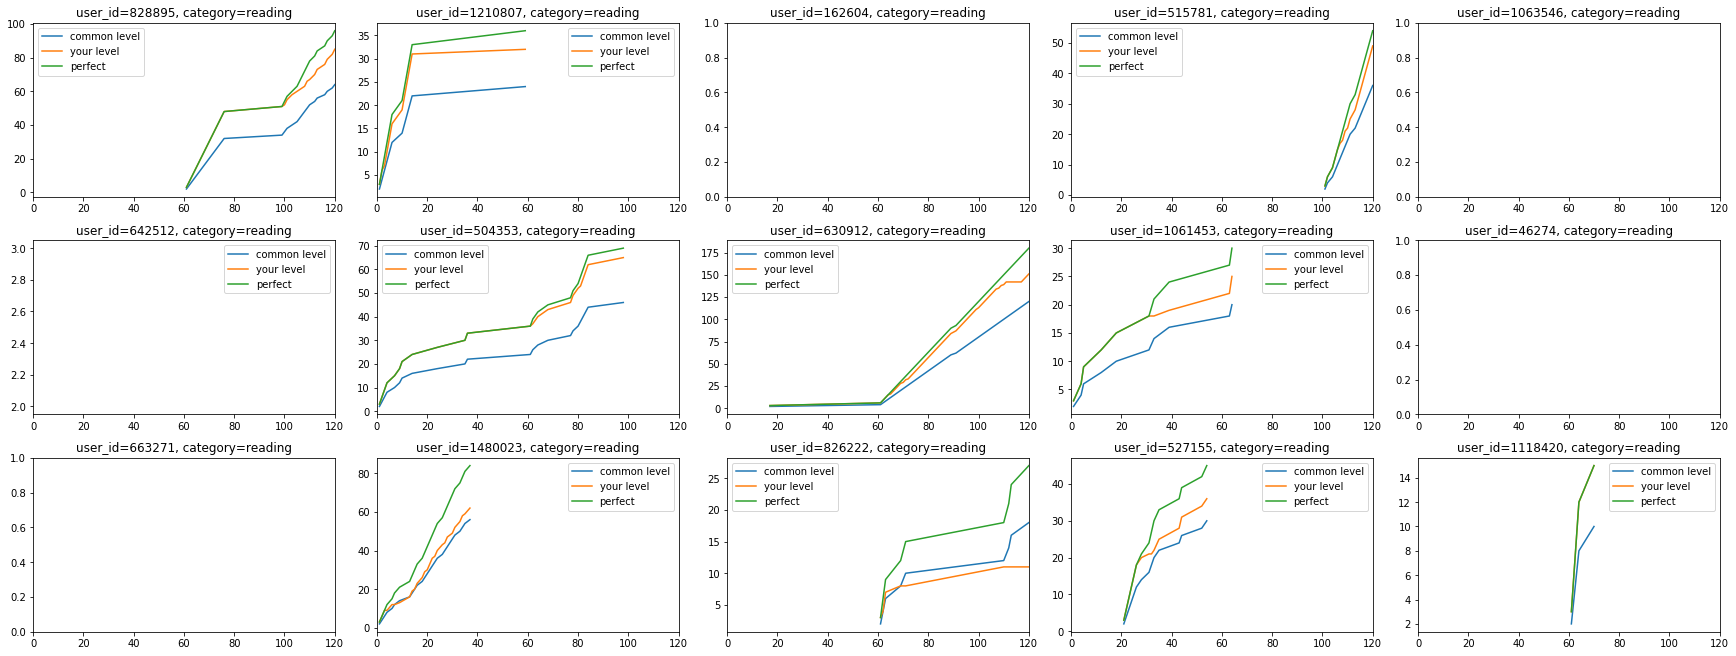

In [84]:
category = "reading"
culumice(category)

In [85]:
def culumice_user(user_id):
    user = student_process_test[(student_process_test.user_id == user_id) & (student_process_test.lesson_id > 0) & (student_process_test.lesson_id < 121)].to_pandas()
    fig1, axs = plt.subplots(2, 4, figsize=(20,6), constrained_layout=True)
    axs = trim_axs(axs, 8)
    lessons = list(range(1,121))
    for ax, category in zip(axs, user.category.unique()):
        ax.set_title('user_id=%s, category=%s' % (str(user_id), category))
        ax.set_xlim((0, 120))
        
        user_category = user.loc[user.category == category]
        if len(user) == 0:
            continue
        user_category = user_category.set_index('lesson_id')
        
        category_mean_df = mean_process_test.loc[(mean_process_test.category==category) & (mean_process_test.lesson_id.isin(lessons))].set_index('lesson_id')
        complexs = user.join(category_mean_df, lsuffix="_same")
        complexs['star'] =  complexs.apply(lambda x: get_star_by_score(x.val, x.avg_score, x.std_val), axis=1)
        complexs['mean_star'] = 2
        complexs['max_star'] = 3
        output = complexs[['mean_star', 'star', 'max_star']].cumsum()
        ax.plot(output.index, output.mean_star, label='common level')
        ax.plot(output.index, output.star, label="your level")
        ax.plot(output.index, output.max_star, label="perfect")
        ax.legend()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

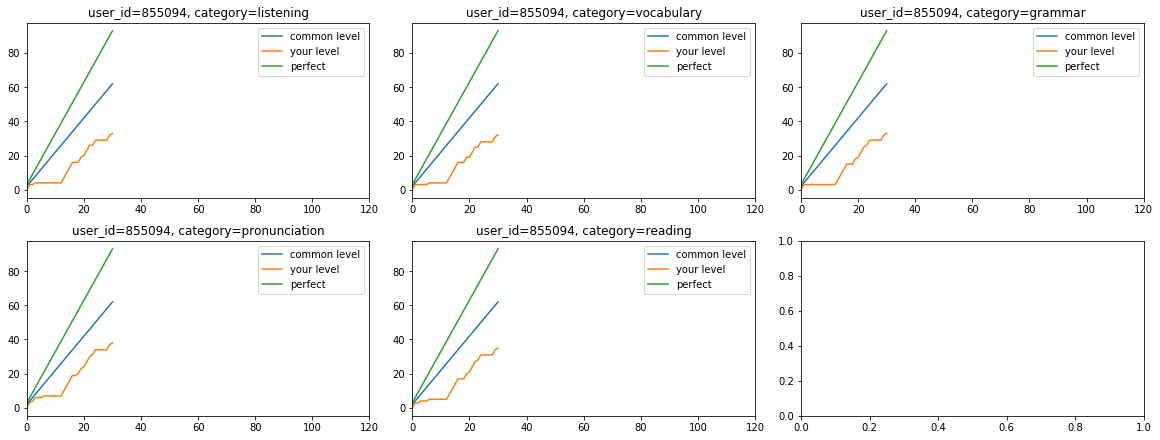

In [87]:
user_id = int(vips.sample(1).values[0])
culumice_user(user_id)

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

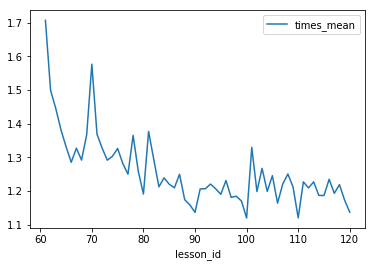

In [6]:
#做题次数情况 x周是lesson1 - lesson 120
times_pdf = mean_df['lesson_id','times_mean'].to_pandas()
times_pdf = times_pdf.set_index('lesson_id')
times_pdf.plot()

### 学生上课频率情况

In [36]:
student_appointment_cnt = odps.get_table("qkids_v2_dev.dwd_student_appointment_count_w").to_df()
sac_df = student_appointment_cnt.student_appointment_cnt.value_counts().to_pandas()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

<BarContainer object of 53 artists>

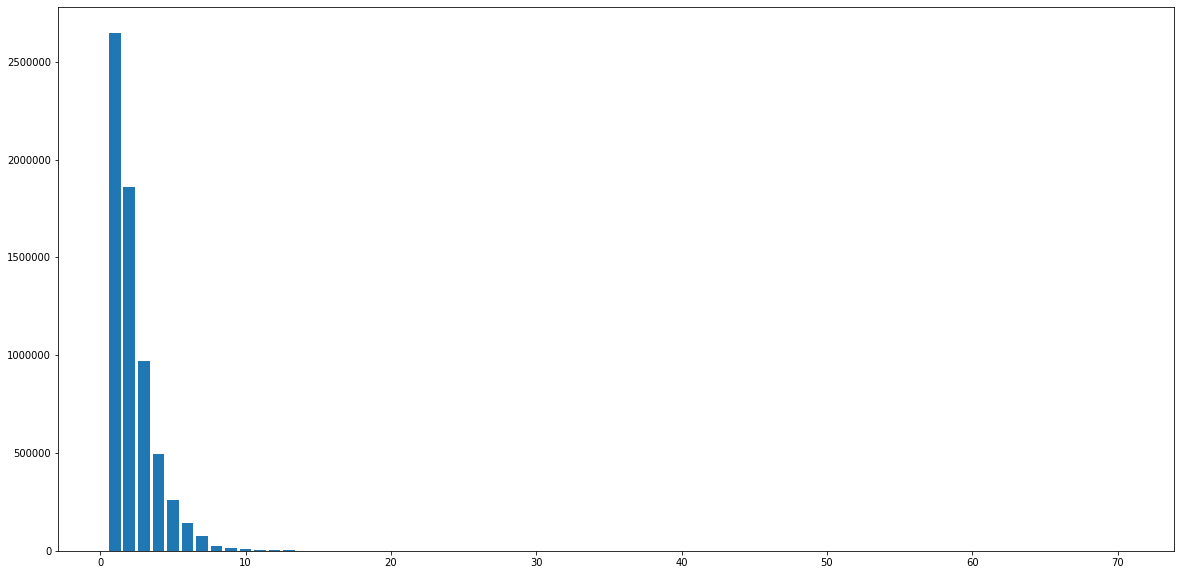

In [37]:
f = plt.figure(figsize=(20,10))
plt.bar(sac_df.student_appointment_cnt.values, sac_df['count'])

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

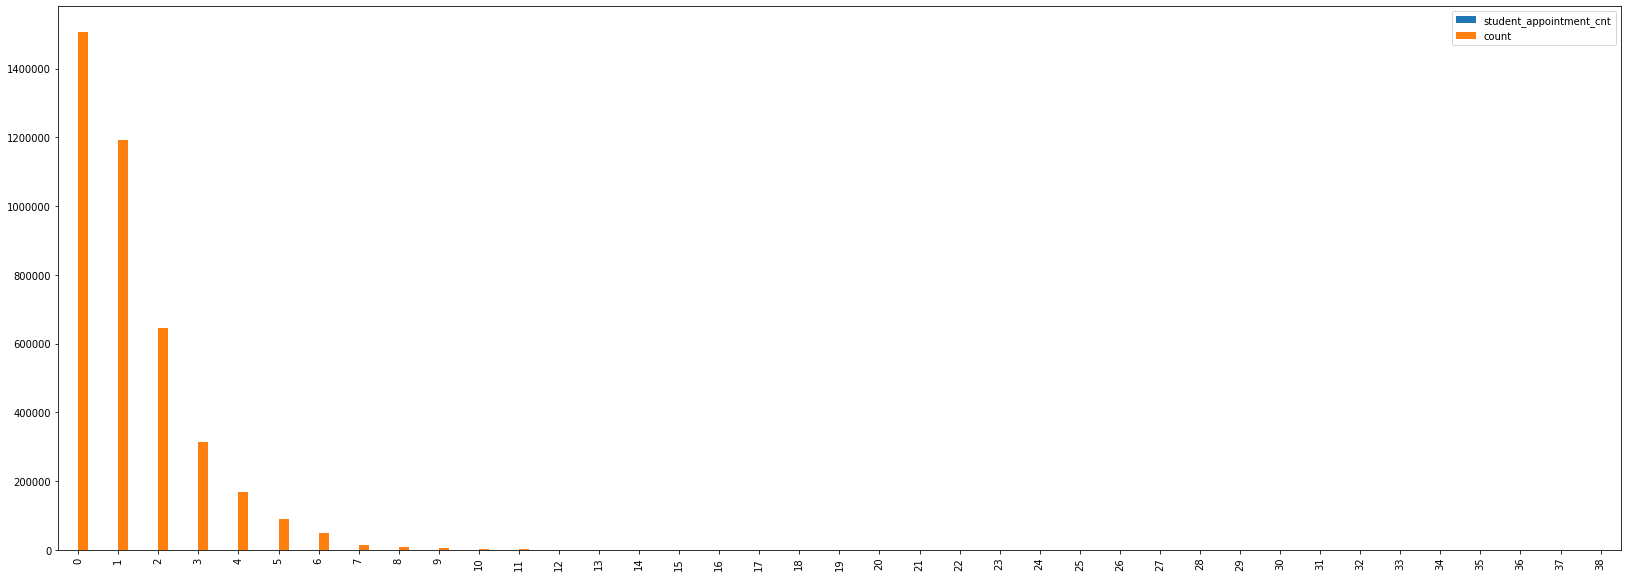

In [38]:
vip_appointment_cnt = odps.get_table("qkids_v2_dev.dws_vip_appointment_cnt_w").to_df()
vac_df = vip_appointment_cnt.student_appointment_cnt.value_counts().to_pandas()
vac_df.plot(kind="bar", figsize=(28,10))

In [39]:
weeks =  list(range(201947, 201938, -1))
week_vip_appointment_cnt = vip_appointment_cnt[(vip_appointment_cnt.week_id> 201938) &(vip_appointment_cnt.week_id< 201948)].to_pandas()

TransientProgressBar(value=0.0)

InstancesProgress()

HTMLNotifier()

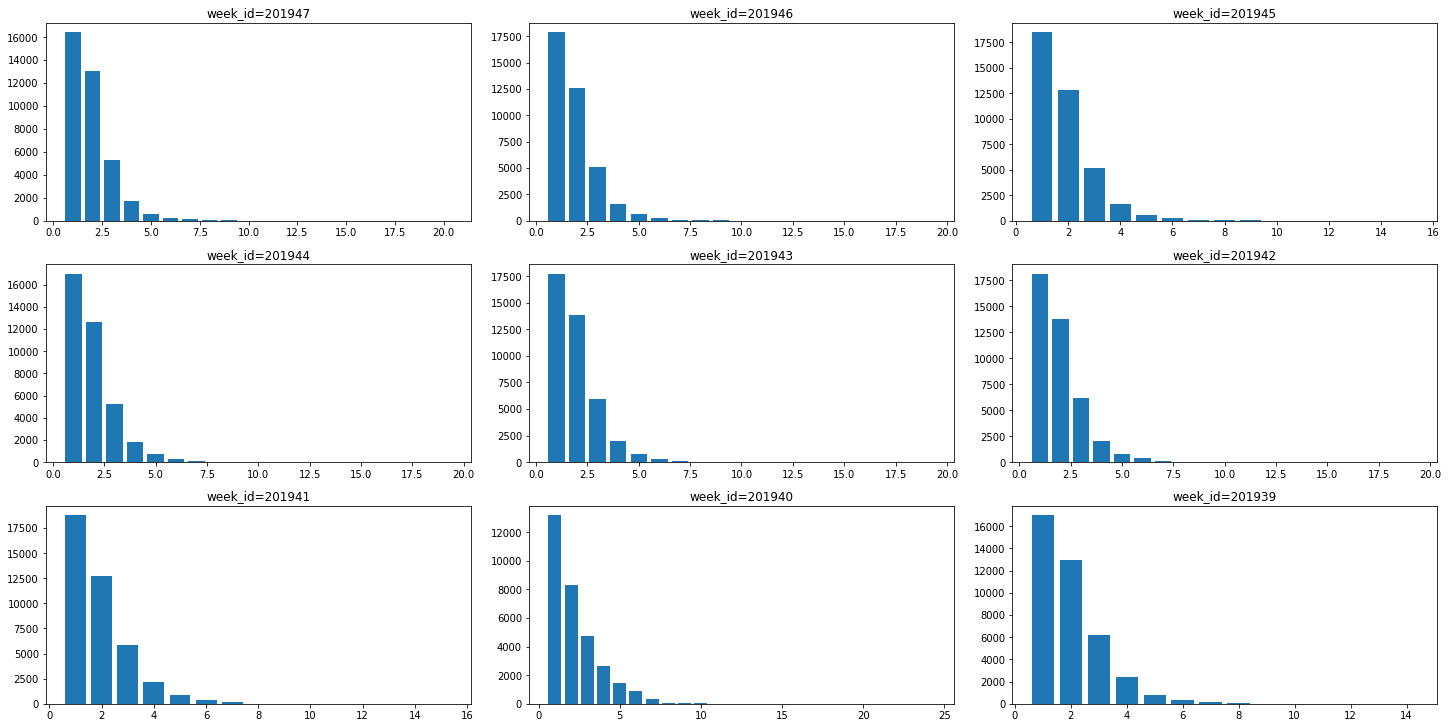

In [40]:
# 每周上课次数频率统计
fig1, axs = plt.subplots(3, 3, figsize=(20,10), constrained_layout=True)
axs = trim_axs(axs, 9)
for ax, week_id in zip(axs, weeks):
    ax.set_title('week_id=%s' % str(week_id))
    data = week_vip_appointment_cnt.loc[(week_vip_appointment_cnt.week_id==week_id), 'student_appointment_cnt'].value_counts()
    ax.bar(data.index, data)

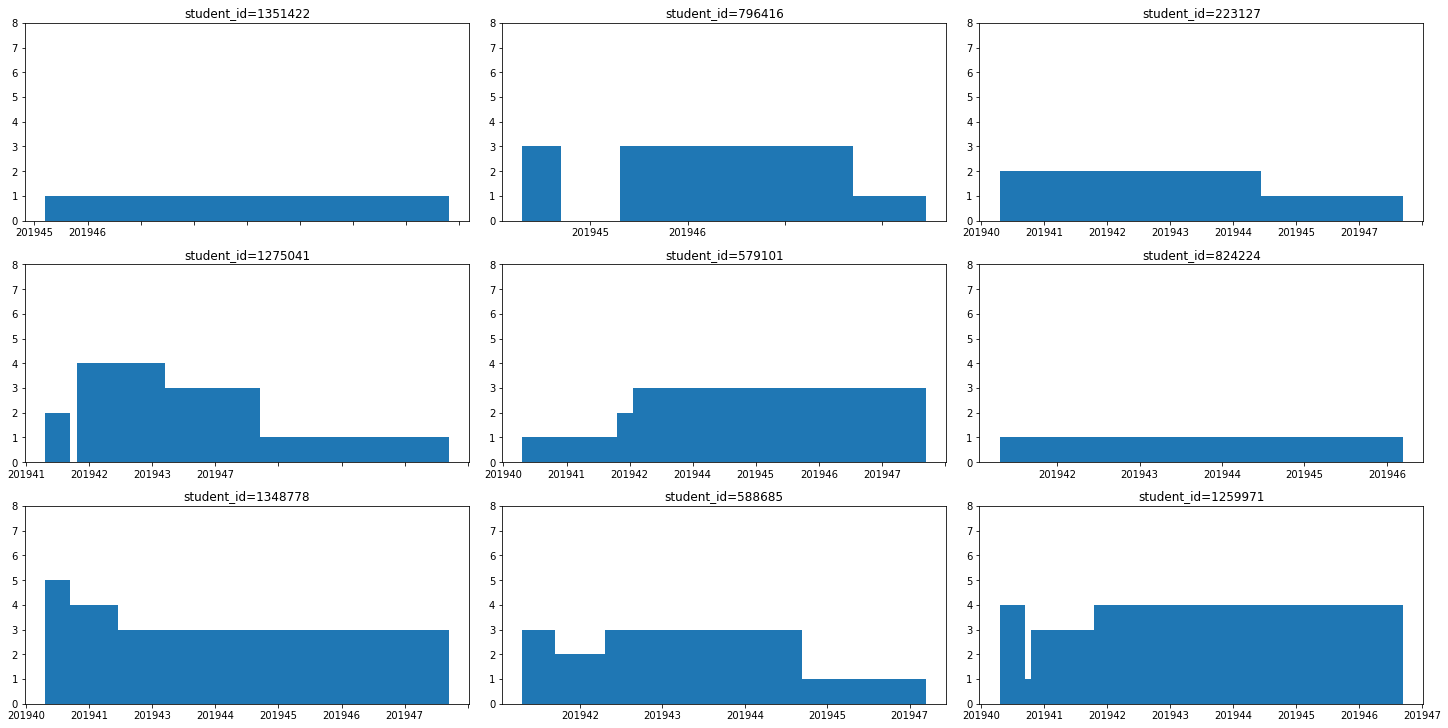

In [41]:
#  抽样学生上课情况统计
fig1, axs = plt.subplots(3, 3, figsize=(20,10), constrained_layout=True)
users = week_vip_appointment_cnt.student_id.sample(9)
axs = trim_axs(axs, 9)
for ax, user_id in zip(axs, users):
    ax.set_title('student_id=%s' % str(user_id))
    data = week_vip_appointment_cnt.loc[(week_vip_appointment_cnt.student_id==user_id)]
    ax.set_xticklabels(data.week_id)
    ax.set_ylim([0,8])
    ax.bar(data.week_id, data.student_appointment_cnt, capstyle="round", joinstyle='bevel', linestyle=":")